In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import cv2

In [2]:
img = cv2.imread('image/11.JPG', 1)
img2 = img

(([], []), ([], []))

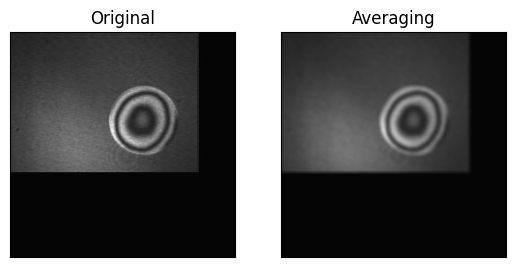

In [3]:
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])

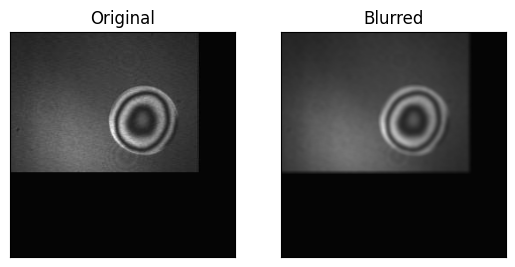

In [4]:
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

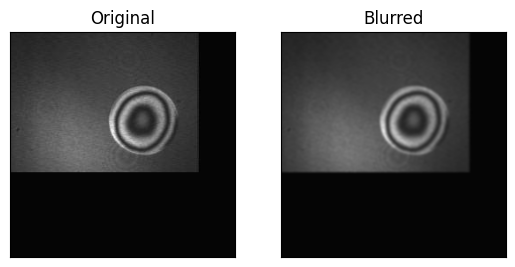

In [5]:
blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

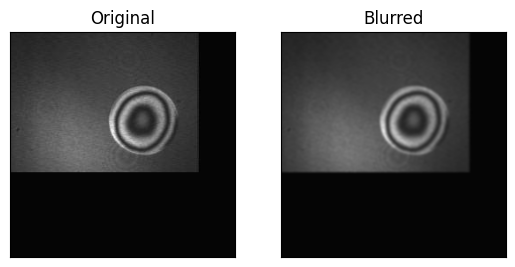

In [6]:
median = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

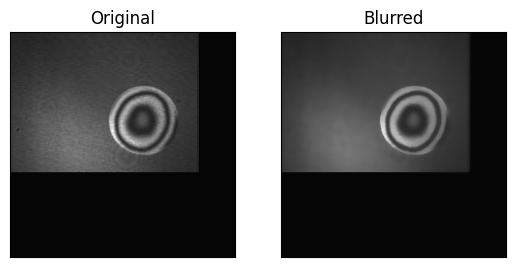

In [7]:
blur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

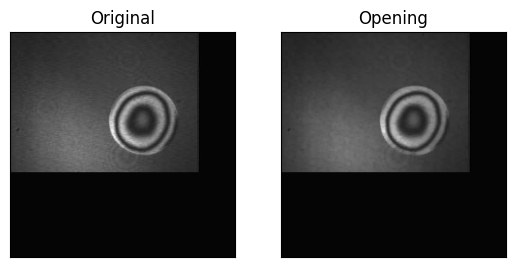

In [8]:
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.show()

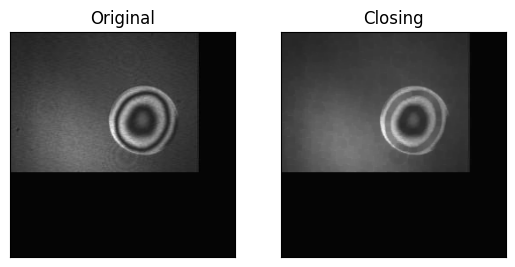

In [9]:
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(closing),plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


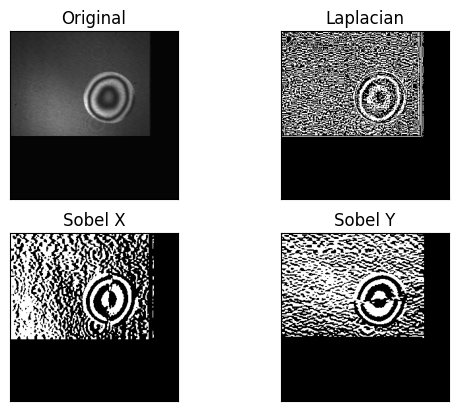

In [10]:
img = img
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Sobel abs(CV_64F)'), ([], []), ([], []))

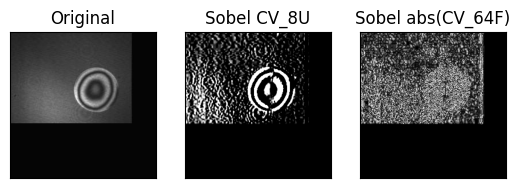

In [11]:
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

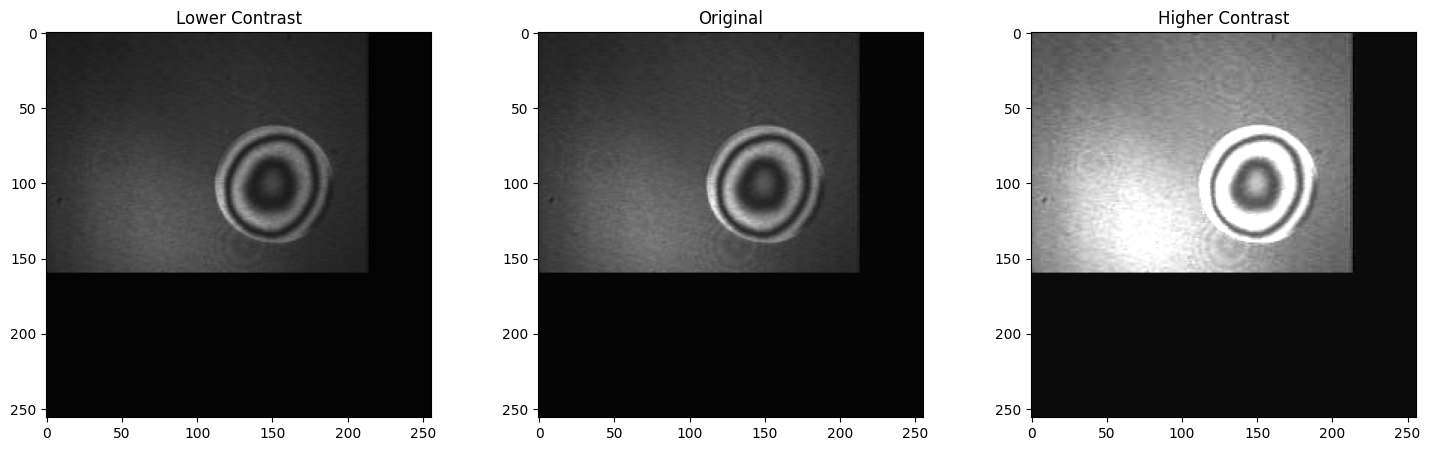

In [12]:
matrix1 = np.ones(img.shape) * .8
matrix2 = np.ones(img.shape) * 2.3 #Có thể thay đổi

img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2),0,255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img);         plt.title("Original");
plt.subplot(133); plt.imshow(img_higher);plt.title("Higher Contrast");

(([], []), ([], []))

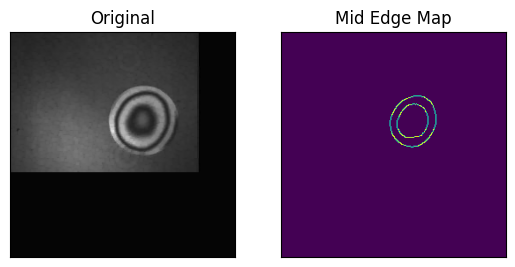

In [13]:
gray = cv2.cvtColor(opening, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
# compute a "wide", "mid-range", and "tight" threshold for the edges
# using the Canny edge detector
mid = cv2.Canny(blurred, 30, 150)
plt.subplot(121),plt.imshow(opening),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mid),plt.title('Mid Edge Map')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

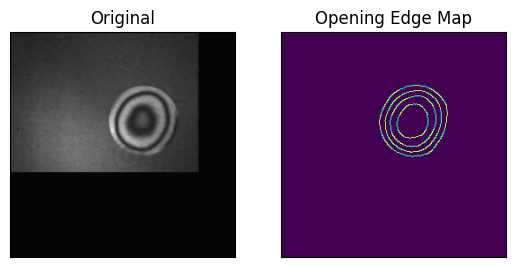

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
# compute a "wide", "mid-range", and "tight" threshold for the edges
# using the Canny edge detector
mid = cv2.Canny(blurred, 30, 150)
contours, hierarchy = cv.findContours(mid, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# mid = cv.drawContours(mid, contours, -1, (0,255,0), 3)
plt.subplot(121),plt.imshow(opening),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mid),plt.title('Opening Edge Map')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

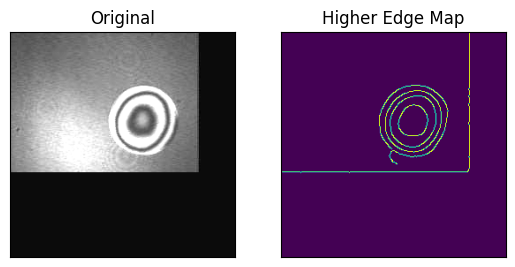

In [15]:
gray = cv2.cvtColor(img_higher, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (15, 15), 0)
# compute a "wide", "mid-range", and "tight" threshold for the edges
# using the Canny edge detector
mid = cv2.Canny(blurred, 30, 150)
plt.subplot(121),plt.imshow(img_higher),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(mid),plt.title('Higher Edge Map')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

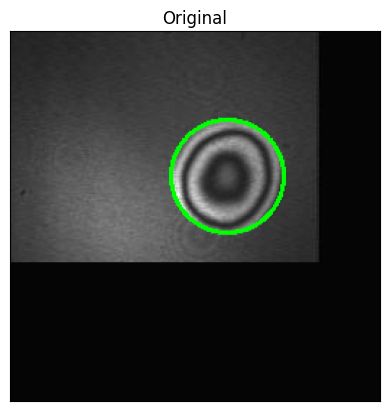

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.bilateralFilter(gray,10,50,50)
minDist = 100
param1 = 30 #500
param2 = 20 #200 #smaller value-> more false circles
minRadius = 5
maxRadius = 200 #10

# docstring of HoughCircles: HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
plt.subplot(111),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

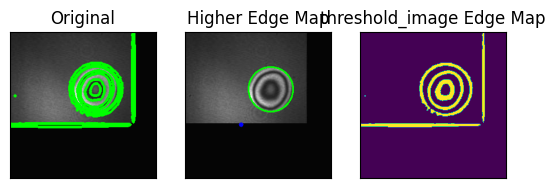

In [17]:
import cv2
gray_image = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)
threshold_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY_INV, 15, 7)

# Step 3: Find contours
contours, _ = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
# Step 4: Draw contours (optional)
contour_image = np.copy(img2)
cv.drawContours(img2, contours, -1, (0,255,0), 3)
area = cv.contourArea(cnt)

M = cv.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
# Define the color of the point (BGR format)
point_color = (0, 0, 255)  # Red color in BGR format (Blue, Green, Red)
# Define the radius of the point (in pixels)
radius = 4
# Draw the point on the image
cv2.circle(contour_image, (cx, cy), radius, point_color, -1)
plt.subplot(131),plt.imshow(img2),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(contour_image),plt.title('Higher Edge Map')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(threshold_image),plt.title('threshold_image Edge Map')
plt.xticks([]), plt.yticks([])
